**Trabajo con Pandas**

***15.11.2017***

In [1]:
import pandas as pd

****Para que jupyter me muestre graficos****

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
train = pd.read_csv('/home/ubuntu/MachineLearningTest/data/train.csv')

In [4]:
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
train.head(22)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [8]:
train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,262.000000,263.000000,264.000000
mean,54.382576,0.670455,3.155303,131.162879,250.367424,0.151515,1.037879,150.015152,0.325758,1.016667,1.583333,0.671756,4.676806,0.901515
std,9.010843,0.470941,0.952548,17.871531,51.084265,0.359231,0.997375,23.215140,0.469547,1.140120,0.617140,0.950440,1.945369,1.232388
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,214.000000,0.000000,0.000000,135.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.500000,0.000000,2.000000,154.000000,0.000000,0.750000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,278.000000,0.000000,2.000000,167.250000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [9]:
train.age

0      63.0
1      67.0
2      67.0
3      37.0
4      41.0
5      56.0
6      62.0
7      57.0
8      63.0
9      53.0
10     57.0
11     56.0
12     56.0
13     44.0
14     52.0
15     57.0
16     48.0
17     54.0
18     48.0
19     49.0
20     64.0
21     58.0
22     58.0
23     58.0
24     60.0
25     50.0
26     58.0
27     66.0
28     43.0
29     40.0
       ... 
234    54.0
235    54.0
236    56.0
237    46.0
238    49.0
239    42.0
240    41.0
241    41.0
242    49.0
243    61.0
244    60.0
245    67.0
246    58.0
247    47.0
248    52.0
249    62.0
250    57.0
251    58.0
252    64.0
253    51.0
254    43.0
255    42.0
256    67.0
257    76.0
258    70.0
259    57.0
260    44.0
261    58.0
262    60.0
263    44.0
Name: age, Length: 264, dtype: float64

In [ ]:
train.num

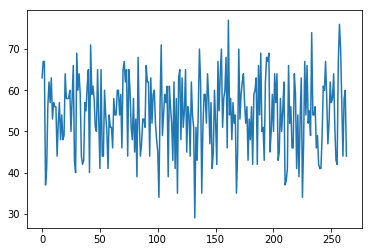

In [10]:
train.age.plot()

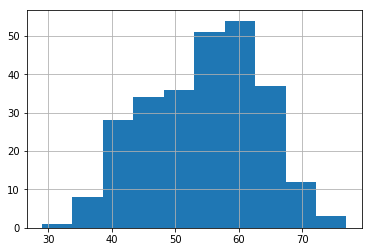

In [11]:
train['age'].hist()

In [ ]:
train.age.hist()

In [ ]:
train.hist(figsize=(20,20))

In [ ]:
train.hist()

In [ ]:
train.boxplot('age')

In [ ]:
train.boxplot('num')

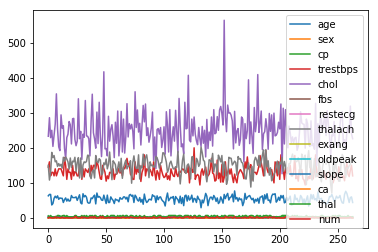

In [12]:
train.plot()

*** Localizar un valor concreto. Fil 22 Col 3 ***  
iloc[fila,columna] Tener en cuenta que comenzamos a numerar por el 0

In [ ]:
train.iloc[21,2]

***Así saco la edad del registro 22***

In [ ]:
train.loc[21,'age']

***Tamaño de la tabla***  
Devuelve filas y columnas en una tupla

In [13]:
train.shape

(264, 14)

##### *** Sólo quiero las filas***

In [14]:
nrow = train.shape[0]

***Igual mediante lenght ***

In [15]:
nrow == len(train['num'])

True

In [17]:
nrow == len(train.age)

True

In [15]:
nrow

264

In [12]:
train.num

0      0
1      2
2      1
3      0
4      0
5      0
6      3
7      0
8      2
9      1
10     0
11     0
12     2
13     0
14     0
15     0
16     1
17     0
18     0
19     0
20     0
21     0
22     1
23     3
24     4
25     0
26     0
27     0
28     0
29     3
      ..
234    0
235    3
236    2
237    1
238    0
239    0
240    0
241    0
242    0
243    2
244    0
245    2
246    2
247    1
248    3
249    0
250    0
251    1
252    0
253    0
254    0
255    0
256    0
257    0
258    0
259    1
260    0
261    3
262    0
263    0
Name: num, Length: 264, dtype: int64

***Valores distintos***

In [20]:
train.num.unique()

array([0, 2, 1, 3, 4])

In [21]:
train.num.unique

<bound method Series.unique of 0      0
1      2
2      1
3      0
4      0
5      0
6      3
7      0
8      2
9      1
10     0
11     0
12     2
13     0
14     0
15     0
16     1
17     0
18     0
19     0
20     0
21     0
22     1
23     3
24     4
25     0
26     0
27     0
28     0
29     3
      ..
234    0
235    3
236    2
237    1
238    0
239    0
240    0
241    0
242    0
243    2
244    0
245    2
246    2
247    1
248    3
249    0
250    0
251    1
252    0
253    0
254    0
255    0
256    0
257    0
258    0
259    1
260    0
261    3
262    0
263    0
Name: num, Length: 264, dtype: int64>

In [ ]:
for elemento in train.num:
    print(elemento)

***Así modifico un valor***

In [ ]:
for i in range(nrow):
    print(i)

#loc referencia a index y columna / iloc referencia numericamente

In [ ]:
for i in range(nrow):
    if train['num'][i] == 0:
        print(train['num'][i])

In [16]:
for i in range(nrow):
    if train['num'][i] != 0:
        train.loc[i,'num'] = 1

In [17]:
train.num.unique()

array([0, 1])

** num ** es la variable que me dice si una persona está enferma o no. 0 es sano y el resto enferma. Es la variable con la que vamos a trabajar

*** Preprocessing ***  
Vamos a asignar el valor media a aquellas variables que contienen NaN

In [18]:
from sklearn.preprocessing import Imputer

Axis 0 es para columnas y 1 para filas. La siguiente consulta me devuelve todos los registros y con False me dice que ese valor no es nulo.

In [19]:
train.shape

(264, 14)

In [20]:
train.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


axis 0 Para que lo haga por columnas

Esta siguiente consulta me dice las columnas en las que hay nulos

In [21]:
train.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca           True
thal         True
num         False
dtype: bool

Así obtengo la fila con nulos

In [22]:
train.isnull().any(1)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
234    False
235    False
236    False
237    False
238    False
239    False
240    False
241    False
242    False
243    False
244    False
245    False
246    False
247    False
248    False
249    False
250    False
251    False
252    False
253    False
254    False
255    False
256    False
257    False
258    False
259    False
260    False
261    False
262    False
263    False
Length: 264, dtype: bool

Y así me quedo con aquellas filas que contienen los nulos

In [23]:
train.loc[train.isnull().any(1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1


Aquí le digo que la transformación que quiero hacer es calcular la media y asignarla a los valores nulos. En lugar de transformar también podría decirle que lo que quiero es predecir

Y ahora aplico esa transformación

In [24]:
train.shape

(264, 14)

In [25]:
#train = pd.DataFrame(imp.transform(train),columns=train.columns).loc[train.isnull().any(1)]
train = train.fillna(train.mean())

In [26]:
train.shape

(264, 14)

In [27]:
train.loc[train.isnull().any(1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


In [ ]:
train.groupby("sex").sum()

In [ ]:
train.groupby('sex').size()

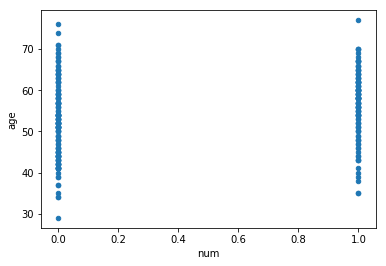

In [28]:
train.plot(kind='scatter', x='num', y='age')

*** Url de referencia para pintar el scatter_matrix ***

In [29]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43fc44a6a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f43f99c82e8>]], dtype=object)

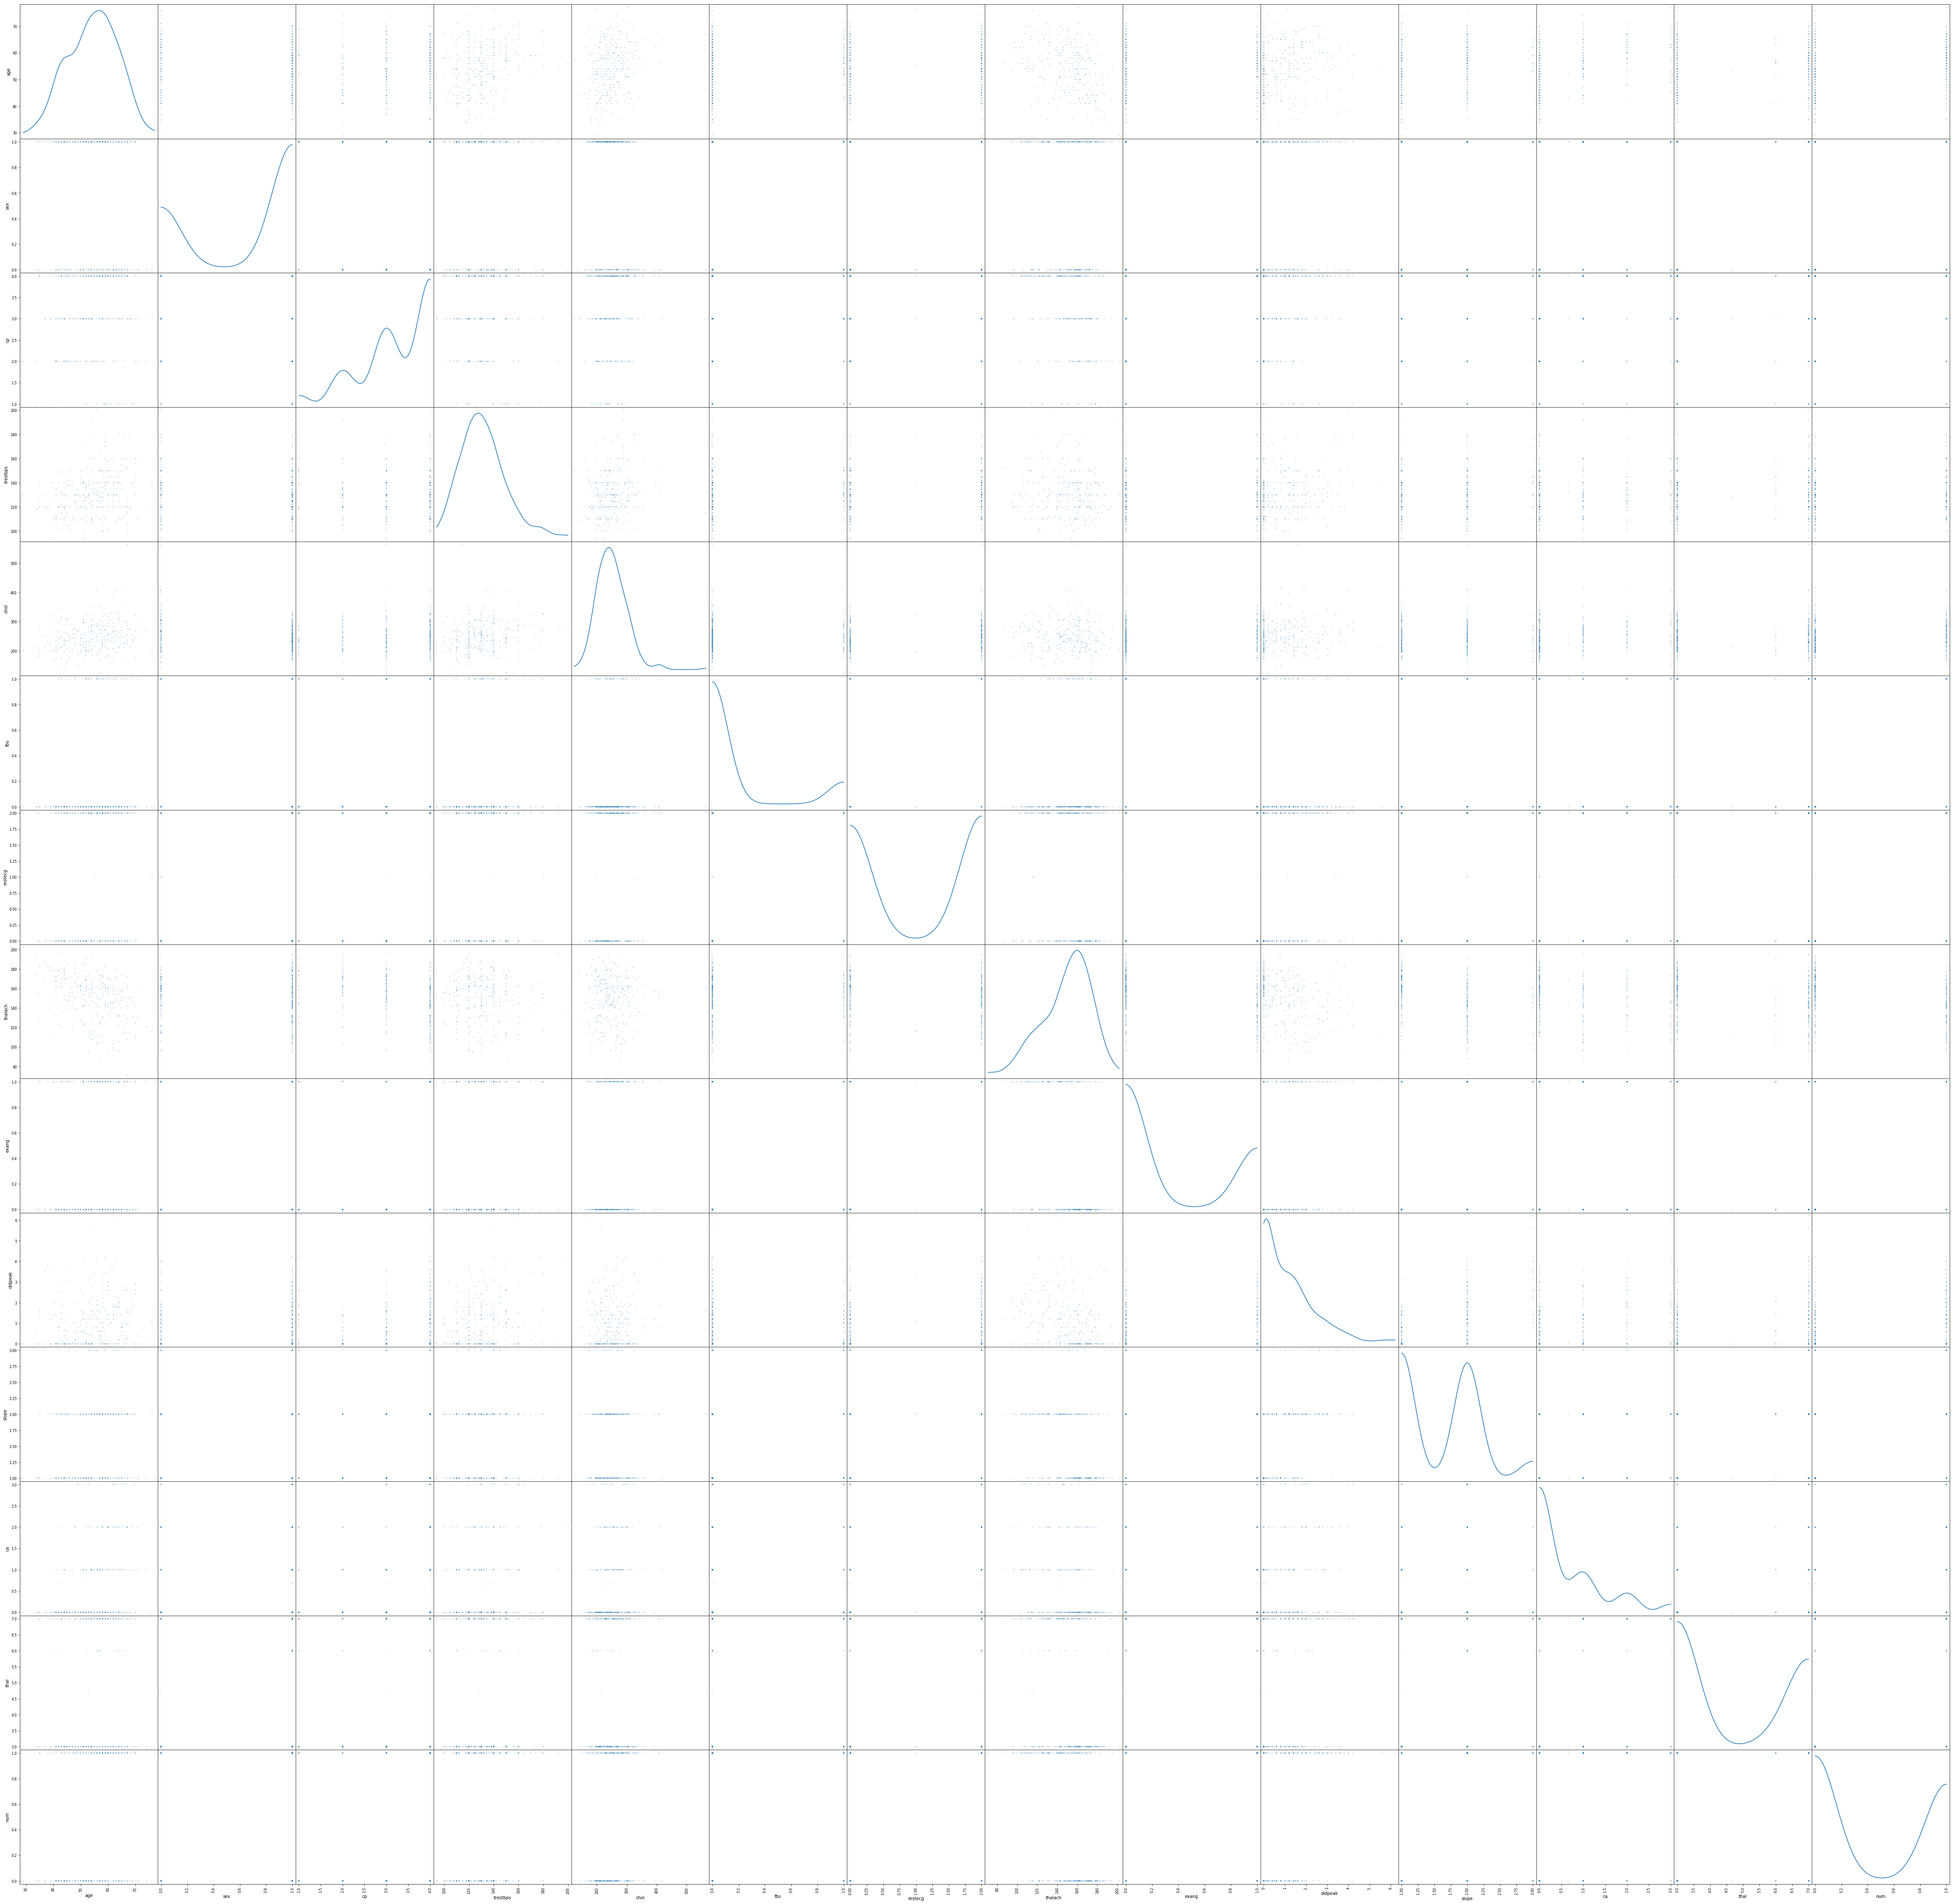

In [30]:
scatter_matrix(train, alpha=0.2, figsize=(80,80), diagonal='kde')

*** Cargamos el dataset que vamos a utilizar como datos de test ***

*** Vamos a dividir en dos nuestro dataset de train. Una parte para el training y otra para la validación. No vamos a utilizar el dataset test.  
Primero nos quedamos con todas las filas y todas las columnas menos num, que es la columna a predecir, y lo asignamos a la variable X***

In [32]:
train.iloc[:,:-1].as_matrix()

array([[ 63.,   1.,   1., ...,   3.,   0.,   6.],
       [ 67.,   1.,   4., ...,   2.,   3.,   3.],
       [ 67.,   1.,   4., ...,   2.,   2.,   7.],
       ..., 
       [ 58.,   0.,   2., ...,   1.,   2.,   3.],
       [ 60.,   0.,   1., ...,   1.,   0.,   3.],
       [ 44.,   1.,   3., ...,   1.,   0.,   3.]])

***Ahora extraemos la variable num y esa columna la asignamos a la variable y***

In [33]:
train.iloc[:,-1].as_matrix()

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

***Aquí es donde hacemos la asignación a X y a y***

In [34]:
X, y = train.iloc[:,:-1].as_matrix(), train.iloc[:,-1].as_matrix()

In [35]:
train.shape

(264, 14)

In [36]:
X.shape

(264, 13)

In [37]:
y.shape

(264,)

In [38]:
print(X.ndim)

2


In [39]:
print(y.ndim)

1


In [40]:
X

array([[ 63.,   1.,   1., ...,   3.,   0.,   6.],
       [ 67.,   1.,   4., ...,   2.,   3.,   3.],
       [ 67.,   1.,   4., ...,   2.,   2.,   7.],
       ..., 
       [ 58.,   0.,   2., ...,   1.,   2.,   3.],
       [ 60.,   0.,   1., ...,   1.,   0.,   3.],
       [ 44.,   1.,   3., ...,   1.,   0.,   3.]])

In [41]:
y

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

*** Ahora dividimos X y y en dos partes. Una para train y otra para test (para corroborar cómo ha ido nuestra predicción.  
Mediante test_size le indico que tome el 66% de los datos para hacer el train y deje el 33% restante para hacer el test. Cada vez que lo ejecute dividirá ese dataset en esas proporciones, pero tomará unos datos distintos cada vez.***

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
X_test

array([[ 59.,   1.,   4., ...,   3.,   0.,   7.],
       [ 68.,   0.,   3., ...,   2.,   0.,   3.],
       [ 39.,   1.,   3., ...,   1.,   0.,   3.],
       ..., 
       [ 54.,   1.,   4., ...,   2.,   1.,   7.],
       [ 70.,   1.,   4., ...,   3.,   0.,   7.],
       [ 29.,   1.,   2., ...,   1.,   0.,   3.]])

***Contra estos valores de y_test vamos a comparar nuestras predicciones utilizando Random Forest***

In [45]:
y_test

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

***Vamos ahora con nuestro RandomForest***

In [46]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [47]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

***Entrenamos nuestro algoritmo utilizando X_train y validando contra X_test. Cuando haya terminado el entrenamiento, utilizamos y_train para predecir y_pred***

In [48]:
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [49]:
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [50]:
from sklearn.metrics import confusion_matrix

***Visualizamos la matriz de confusión, que es la que compara los resultados del algoritmo 'y_pred' contra los valores reales 'y_test'. De esta forma, sabemos el grado de acierto de nuestro algoritmo***

In [51]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [52]:
cnf_matrix

array([[41,  3],
       [10, 34]])

In [54]:
pd.DataFrame(cnf_matrix,columns=['no','si'], index=['no','si'])

,no,si
no,41,3
si,10,34


***10 son los no enfermos que el modelo ha dicho que sí lo están y 3 son enfermos que mi modelo dijo que no lo eran.  
Dependiendo de la naturaleza de los datos con los que estemos trabajando nos puede interesar predecir más enfermos, para prevenir y hacerles un reconocimiento antes de que enfermen. En otros casos puede ser que nos interese lo contrario.***

*** Ahora vamos a escribir una función que nos permita lanzar el modelo varias veces (5 por ejemplo). Vamos a guardar los datos de entrada y las matrices de confusión de cada uno de ellos ***

In [55]:
nsplit = 5
perc = 0.33

def traintest(nsplit, perc):
    results = []
    for i in range(nsplit):
        results_int = []
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=perc)
        clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
        y_pred = clf.fit(X_train, y_train).predict(X_test)
        cnf_matrix = confusion_matrix(y_test, y_pred)
        
        results_int.append('------Item------')
        #results_int.append(X_train)
        #results_int.append(X_test)
        #results_int.append(y_train)
        #results_int.append(y_test)
        #results_int.append(y_pred)
        results_int.append(cnf_matrix)
        results.append(results_int)
    return results

traintest(nsplit, perc)

#Si añado: random_state=42 al train_test_split me salen siempre los mismos valores

[['------Item------', array([[39,  6],
         [16, 27]])], ['------Item------', array([[46,  5],
         [14, 23]])], ['------Item------', array([[43,  5],
         [12, 28]])], ['------Item------', array([[46,  9],
         [11, 22]])], ['------Item------', array([[47,  6],
         [13, 22]])]]

*** Ahora vamos a utilizar Análisis de Componentes principales (PCA) para reducir nuestras variables de entrada y que automáticamente se quede con las más significativas.***

In [56]:
from sklearn.decomposition import PCA

**** Si queremos podemos dejar vacío el número de componentes principales para que sea el algoritmo el que lo ajuste ****

In [57]:
pca = PCA(11)

In [58]:
Xtr =pca.fit(X).transform(X)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(Xtr, y, test_size=0.33)

In [60]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [61]:
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [62]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [63]:
pd.DataFrame(cnf_matrix,columns=['no','si'], index=['no','si'])

,no,si
no,49,6
si,12,21


*** Parece que hay demasiada variación en los resultados aún ejecutando varias veces con el mismo número de componentes principales ***